# Estimate toponym ambiguity and diversity
In which we determine how ambiguous and diverse the toponyms in GeoCorpora appear to be.

In [5]:
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from data_helpers import load_geocorpora_data, load_simplified_geonames_data

## Load data

In [3]:
geocorpora = load_geocorpora_data()
geocorpora.head()

,tweet_id_str,char_position,text,geoNameId,toponym,country_code,longitude,latitude,surrogate_geojson,uncertain_semantics,vague,overlapping_ambiguous,non_overlapping_ambiguous,not_in_geonames
feature_id,,,,,,,,,,,,,,
1,557916969433718785,10,Rivers,2324433,Rivers State,NG,6.82766,4.74974,NaN,True,NaN,NaN,NaN,NaN
2,557916969433718785,85,Nigeria,2328926,Federal Republic of Nigeria,NG,8.00000,10.00000,NaN,NaN,NaN,NaN,NaN,NaN
3,557916969433718785,99,Nigeria,2328926,Federal Republic of Nigeria,NG,8.00000,10.00000,NaN,NaN,NaN,NaN,NaN,NaN
4,517722122357964800,32,Alabama,4829764,Alabama,US,-86.75026,32.75041,NaN,NaN,NaN,NaN,NaN,NaN
5,489545428804055041,41,Libya,2215636,Libya,LY,17.00000,28.00000,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
geonames_data = load_simplified_geonames_data()

In [9]:
geonames_data.head()

,geonames_ID,name,alternate_names,latitude,longitude,feature_class,feature_code,population,alternate_name_count
0,2986043,Pic de Font Blanca,"Pic de Font Blanca,Pic du Port",42.64991,1.53335,T,PK,0,2
1,2994701,Roc Mélé,"Roc Mele,Roc Meler,Roc Mélé",42.58765,1.74028,T,MT,0,3
2,3007683,Pic des Langounelles,Pic des Langounelles,42.61203,1.47364,T,PK,0,1
3,3017832,Pic de les Abelletes,"Pic de la Font-Negre,Pic de la Font-Nègre,Pic ...",42.52535,1.73343,T,PK,0,3
4,3017833,Estany de les Abelletes,"Estany de les Abelletes,Etang de Font-Negre,Ét...",42.52915,1.73362,H,LK,0,3


## Toponym diversity
What is the distribution of feature and country codes?

In [12]:
# feature codes
feat_codes = pd.merge(geocorpora.loc[:, ['geoNameId']], geonames_data.loc[:, ['geonames_ID', 'feature_code']],
                      left_on='geoNameId', right_on='geonames_ID', how='inner').drop('geoNameId', inplace=False, axis=1)
feat_codes.head()

,geonames_ID,feature_code
0,2324433,ADM1
1,2324433,ADM1
2,2328926,PCLI
3,2328926,PCLI
4,2328926,PCLI


In [14]:
feat_counts = feat_codes.loc[:, 'feature_code'].value_counts()
feat_counts = feat_counts / feat_counts.sum()
feat_counts

PCLI     0.351744
ADM1     0.139858
PPL      0.115310
PPLA2    0.087855
PPLA     0.057171
PPLC     0.047804
ADM2     0.029716
CONT     0.025517
RGN      0.020995
SCH      0.009690
BLDG     0.008398
RGNE     0.008398
AIRP     0.007429
PCLS     0.006460
ADM3     0.005491
PRK      0.005168
STM      0.005168
ISL      0.005168
PPLA3    0.004845
PPLX     0.004522
AMUS     0.004522
VAL      0.003553
HSP      0.002907
HTL      0.002907
MT       0.002261
AREA     0.001938
OCN      0.001938
UNIV     0.001938
SPNG     0.001938
CH       0.001615
           ...   
MTS      0.000646
ZN       0.000646
PRN      0.000646
PAL      0.000646
ADM2H    0.000646
TNL      0.000323
CNL      0.000323
PPLG     0.000323
MSQE     0.000323
RDJCT    0.000323
MKT      0.000323
HSTS     0.000323
GDN      0.000323
ST       0.000323
BUSTN    0.000323
ADMD     0.000323
ADMF     0.000323
MNMT     0.000323
PPLL     0.000323
SCHC     0.000323
RDGU     0.000323
PEN      0.000323
DSRT     0.000323
RF       0.000323
CAPE     0

According to the codes [here](http://www.geonames.org/export/codes.html), the most popular codes here are:

1. independent political entity (country)
2. first-order administrative region (state)
3. populated place (city, town, village)

In [8]:
# country codes
country_counts = geocorpora.loc[:, 'country_code'].value_counts()
country_counts = country_counts / country_counts.sum()
country_counts

US    0.421160
GB    0.068259
PS    0.034130
IN    0.031399
SY    0.030717
UA    0.027304
IR    0.019795
IL    0.019113
NG    0.018430
JP    0.018089
PK    0.017065
SL    0.014676
MY    0.013993
IQ    0.012969
ZA    0.011945
CN    0.011945
CA    0.011604
AU    0.011263
PH    0.010922
LR    0.010580
YE    0.010580
RU    0.008874
EG    0.008532
ID    0.007850
HK    0.006143
IE    0.006143
HT    0.006143
MX    0.005461
FR    0.005461
NZ    0.005461
        ...   
BJ    0.000341
AO    0.000341
BY    0.000341
AE    0.000341
RO    0.000341
AG    0.000341
NO    0.000341
HR    0.000341
KW    0.000341
NR    0.000341
FO    0.000341
FI    0.000341
LK    0.000341
MZ    0.000341
CY    0.000341
CR    0.000341
SK    0.000341
SI    0.000341
SN    0.000341
TW    0.000341
ET    0.000341
SM    0.000341
SB    0.000341
SE    0.000341
PE    0.000341
PA    0.000341
AD    0.000341
HN    0.000341
HU    0.000341
DO    0.000341
Name: country_code, Length: 132, dtype: float64

OK, about 58% of the locations are from outside US. Work.

## Toponym ambiguity
Now! Let's load in the queries that we've already made and figure out the relative ambiguity.

In [19]:
names_queries = pd.read_csv('../../data/mined_tweets/GeoCorpora/geocorpora_names_query_results.tsv', sep='\t', index_col=False)
names_queries.head()

,query,geonames_ID
0,Rivers,3451033
1,Rivers,6122707
2,Rivers,1558773
3,Rivers,3036784
4,Rivers,6427411


Let's get a histogram of candidate counts.

In [26]:
from data_helpers import query_norm
names_queries.loc[:, 'query_norm'] = names_queries.loc[:, 'query'].apply(lambda x: query_norm(x.decode('utf-8')))
candidate_counts = names_queries.groupby('query_norm').apply(lambda x: x.loc[:, 'geonames_ID'].nunique())
candidate_counts.sort_values(inplace=True, ascending=False)
candidate_counts

query_norm
san antonio               2949
san juan                  2021
san francisco             1924
los angeles                528
victoria                   434
san diego                  398
big island                 319
union                      314
springfield                291
san francisco bay area     275
california                 271
bali                       265
boston                     261
colorado                   255
florida                    249
bo                         235
las vegas                  221
aurora                     220
mo                         207
loma prieta                204
victoria park              200
asia                       195
santa fe canal             188
lincoln                    188
richmond                   188
bandar-abbas               187
bagh                       186
brooklyn                   184
moradabad                  182
monroe township            181
                          ... 
ks                          

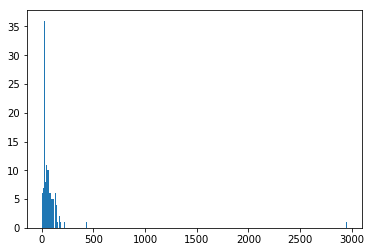

In [27]:
bin_count = candidate_counts.max()
plt.hist(candidate_counts, bins=bin_count)
plt.show()

How about for the GeoNames querying results?

In [29]:
geo_queries = pd.read_csv('../../data/mined_tweets/GeoCorpora/geocorpora_geonames_query_results.tsv', sep='\t', index_col=False)
geo_queries.loc[:, 'query_norm'] = geo_queries.loc[:, 'query'].apply(lambda x: query_norm(x.decode('utf-8')))
candidate_counts = geo_queries.groupby('query_norm').apply(lambda x: x.loc[:, 'geonames_ID'].nunique())
candidate_counts.sort_values(inplace=True, ascending=False)

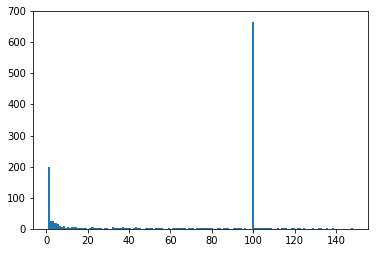

In [30]:
bin_count = candidate_counts.max()
plt.hist(candidate_counts, bins=bin_count)
plt.show()

What percentage of toponyms are ambiguous here?

In [35]:
type(candidate_counts[0])

numpy.int64

In [37]:
candidate_counts_hist = candidate_counts.value_counts().astype(int).sort_values(inplace=False, ascending=False)
candidate_counts_hist = candidate_counts_hist / candidate_counts_hist.sum()
candidate_counts_hist

100    0.559664
1      0.168067
2      0.021849
3      0.021849
4      0.016807
5      0.011765
8      0.007563
6      0.006723
7      0.005882
10     0.005882
14     0.005882
32     0.004202
12     0.004202
43     0.004202
13     0.004202
37     0.004202
22     0.004202
23     0.003361
15     0.003361
103    0.003361
101    0.003361
59     0.003361
17     0.003361
109    0.003361
16     0.002521
104    0.002521
114    0.002521
115    0.002521
108    0.002521
107    0.002521
         ...   
91     0.000840
87     0.000840
65     0.000840
63     0.000840
61     0.000840
96     0.000840
88     0.000840
94     0.000840
54     0.000840
92     0.000840
44     0.000840
93     0.000840
79     0.000840
84     0.000840
69     0.000840
122    0.000840
74     0.000840
76     0.000840
78     0.000840
139    0.000840
29     0.000840
38     0.000840
80     0.000840
119    0.000840
112    0.000840
120    0.000840
129    0.000840
125    0.000840
123    0.000840
148    0.000840
Length: 102, dtype: floa

About 83% of toponyms have more than one candidate. Lots of ambiguity!

## Toponyms per post
How many toponyms per post, on average?

In [40]:
toponyms_per_post = geocorpora.groupby('tweet_id_str').apply(lambda x: x.shape[0])
toponyms_per_post.sort_values(inplace=True, ascending=False)
toponyms_per_post

tweet_id_str
511546368813322243    7
513965477404479489    6
498499891564654592    6
547302821079826432    6
507455778374971393    6
557207436797284352    5
514823401051934720    5
539464256635146240    5
487975679372181504    5
489424461431861248    5
493048842149822464    5
488051619544567809    5
520923741610860544    5
494542973921931264    5
491810714361671680    5
489878597008887808    5
496506836011737088    4
488065793998213123    4
492400842776256512    4
497684113584041984    4
507499246325481472    4
549128933178748929    4
496702436476608512    4
520440610793086976    4
489077075639156736    4
540643103720620032    4
492536621321834496    4
491614986754867200    4
520139166966087680    4
541940590150041600    4
                     ..
531914511502938113    1
531929908952707072    1
531930228567048192    1
530707857524527105    1
530602265854218240    1
530464713256488960    1
529363084461105152    1
528684732067102720    1
528699265799815168    1
528759331765125121    1
528

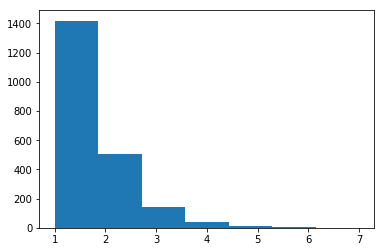

In [41]:
plt.hist(toponyms_per_post, bins=toponyms_per_post.max())
plt.show()

In [42]:
toponyms_per_post_hist = toponyms_per_post.value_counts()
toponyms_per_post_hist = toponyms_per_post_hist / toponyms_per_post_hist.sum()
toponyms_per_post_hist

1    0.668553
2    0.238095
3    0.066950
4    0.018859
5    0.005186
6    0.001886
7    0.000471
dtype: float64

## Wiki coverage
How many toponyms can be found on Wikipedia?

We'll probably have to use those old query results for this one.

In [43]:
geocorpora.head()

,tweet_id_str,char_position,text,geoNameId,toponym,country_code,longitude,latitude,surrogate_geojson,uncertain_semantics,vague,overlapping_ambiguous,non_overlapping_ambiguous,not_in_geonames
feature_id,,,,,,,,,,,,,,
1,557916969433718785,10,Rivers,2324433,Rivers State,NG,6.82766,4.74974,NaN,True,NaN,NaN,NaN,NaN
2,557916969433718785,85,Nigeria,2328926,Federal Republic of Nigeria,NG,8.00000,10.00000,NaN,NaN,NaN,NaN,NaN,NaN
3,557916969433718785,99,Nigeria,2328926,Federal Republic of Nigeria,NG,8.00000,10.00000,NaN,NaN,NaN,NaN,NaN,NaN
4,517722122357964800,32,Alabama,4829764,Alabama,US,-86.75026,32.75041,NaN,NaN,NaN,NaN,NaN,NaN
5,489545428804055041,41,Libya,2215636,Libya,LY,17.00000,28.00000,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
geo_wiki_queries = pd.read_csv('../../data/mined_tweets/GeoCorpora/geocorpora_opencage_query_results.tsv', sep='\t', index_col=False)
geo_wiki_queries.head()

,annotations,bounds,components,confidence,formatted,geometry,query
0,"{u'MGRS': u'32NKL6270635529', u'callingcode': ...","{u'northeast': {u'lat': 5.7300358, u'lng': 7.5...","{u'country': u'Nigeria', u'ISO_3166-1_alpha-2'...",1,"Rivers, Nigeria","{u'lat': 4.8416028, u'lng': 6.8604088}",rivers
1,"{u'MGRS': u'14UMA1160342817', u'callingcode': ...","{u'northeast': {u'lat': 50.0415453, u'lng': -1...","{u'city': u'Rivers', u'ISO_3166-1_alpha-2': u'...",7,"Rivers, MB R0K 1X0, Canada","{u'lat': 50.0310937, u'lng': -100.2342492}",rivers
2,"{u'MGRS': u'29UNU3128635886', u'ITM': {u'easti...","{u'northeast': {u'lat': 52.6821393, u'lng': -8...",{u'city': u'Metropolitan District of Limerick'...,8,"Rivers, Metropolitan District of Limerick, Cou...","{u'lat': 52.6720155, u'lng': -8.5373025}",rivers
3,"{u'MGRS': u'29UNU3374436846', u'ITM': {u'easti...","{u'northeast': {u'lat': 52.690501, u'lng': -8....",{u'city': u'Metropolitan District of Limerick'...,8,"Ballyvarra, Metropolitan District of Limerick,...","{u'lat': 52.680501, u'lng': -8.5008587}",rivers
4,"{u'MGRS': u'30UVA1348184239', u'callingcode': ...","{u'northeast': {u'lat': 50.4039014, u'lng': -4...","{u'ISO_3166-1_alpha-2': u'GB', u'country': u'U...",9,"The Rivers, Wearde Quay PL12 4PD, United Kingdom","{u'lat': 50.4038213, u'lng': -4.2174708}",rivers


In [50]:
geo_wiki_queries.loc[:, 'components'].iloc[0]

"{u'country': u'Nigeria', u'ISO_3166-1_alpha-2': u'NG', u'_type': u'state', u'country_code': u'ng', u'state': u'Rivers'}"

In [53]:
import re
wiki_matcher = re.compile("wikidata")
geo_wiki_queries.loc[:, 'has_wiki'] = geo_wiki_queries.loc[:, 'annotations'].apply(lambda x: len(wiki_matcher.findall(x)) > 0)
print(geo_wiki_queries.loc[:, 'has_wiki'].iloc[:5])

0     True
1    False
2    False
3    False
4    False
Name: has_wiki, dtype: bool


In [54]:
geo_queries_with_wiki_unique_queries = geo_wiki_queries[geo_wiki_queries.loc[:, 'has_wiki']].loc[:, 'query'].unique()
print(len(geo_queries_with_wiki_unique_queries))

817


How many of the posts are covered by this criterion?

In [58]:
geocorpora.loc[:, 'query_norm'] = geocorpora.loc[:, 'text'].apply(lambda x: query_norm(x))
geocorpora.head()

,tweet_id_str,char_position,text,geoNameId,toponym,country_code,longitude,latitude,surrogate_geojson,uncertain_semantics,vague,overlapping_ambiguous,non_overlapping_ambiguous,not_in_geonames,query_norm
feature_id,,,,,,,,,,,,,,,
1,557916969433718785,10,Rivers,2324433,Rivers State,NG,6.82766,4.74974,NaN,True,NaN,NaN,NaN,NaN,rivers
2,557916969433718785,85,Nigeria,2328926,Federal Republic of Nigeria,NG,8.00000,10.00000,NaN,NaN,NaN,NaN,NaN,NaN,nigeria
3,557916969433718785,99,Nigeria,2328926,Federal Republic of Nigeria,NG,8.00000,10.00000,NaN,NaN,NaN,NaN,NaN,NaN,nigeria
4,517722122357964800,32,Alabama,4829764,Alabama,US,-86.75026,32.75041,NaN,NaN,NaN,NaN,NaN,NaN,alabama
5,489545428804055041,41,Libya,2215636,Libya,LY,17.00000,28.00000,NaN,NaN,NaN,NaN,NaN,NaN,libya


In [61]:
geocorpora_with_wiki = geocorpora[geocorpora.loc[:, 'query_norm'].isin(geo_queries_with_wiki_unique_queries)]
print('%d posts with possible wiki links'%(geocorpora_with_wiki.shape[0]))

2617 posts with possible wiki links


Oh wow, that's a lot. What are the posts that are left out?

In [63]:
geocorpora_without_wiki = geocorpora[~geocorpora.loc[:, 'query_norm'].isin(geo_queries_with_wiki_unique_queries)]
geocorpora_without_wiki.head(20)

,tweet_id_str,char_position,text,geoNameId,toponym,country_code,longitude,latitude,surrogate_geojson,uncertain_semantics,vague,overlapping_ambiguous,non_overlapping_ambiguous,not_in_geonames,query_norm
feature_id,,,,,,,,,,,,,,,
10,560639500792373248,115,African Region,6255146,Africa,NaN,21.09375,7.18810,NaN,NaN,NaN,NaN,NaN,True,african region
12,515414104916652034,105,Northcourt road comm. centre,2657780,Abingdon,GB,-1.28278,51.67109,NaN,NaN,NaN,NaN,NaN,True,northcourt road comm centre
19,560558919261892609,79,Northern California,5377887,Northern California Preparatory School,US,-121.43412,38.51518,NaN,NaN,True,NaN,NaN,NaN,northern california
21,496371470722150400,61,312 MARKET ST,4562050,Washington Square,US,-75.15268,39.94706,NaN,NaN,NaN,NaN,NaN,True,312 market street
41,556284895513673728,29,Hanshin,1859449,Kinki Chihō,JP,135.50000,35.00000,NaN,NaN,True,NaN,NaN,True,hanshin
50,530767688399069184,88,Lords,6930645,Parliament,GB,-0.12478,51.49955,NaN,NaN,NaN,NaN,NaN,NaN,lords
55,490663642481053696,36,Rikers Island,5133874,Rikers Island,US,-73.88097,40.79066,NaN,True,NaN,NaN,NaN,True,rikers island
65,496702436476608512,106,Bots,933860,Republic of Botswana,BW,24.00000,-22.00000,NaN,NaN,NaN,NaN,NaN,NaN,bots
81,555198415676915712,110,UNLV,5514204,University of Nevada-Las Vegas,US,-115.14167,36.10775,NaN,True,NaN,NaN,NaN,NaN,unlv


In [44]:
wiki_queries = pd.read_csv('../../data/mined_tweets/GeoCorpora/wikidata_mined_data.tsv', sep='\t', index_col=False)
wiki_queries.head()

,wikidata_ID,pop,lang
0,Q805,26183676,230
1,Q2071629,-1,6
2,Q801,8654900,259
3,Q2471,2957000,136
4,Q1133140,3128,12
